# Ensemble Methods :  Problem 2
## Boosting with SCIKIT


## Disclaimer
These exercises are based on the work by H. Drucker pertaining to the article “Improving Regressors using Boosting Techniques" at Monmouth University. The environment of the exercise have been tuned to the theory content taught at Ravensburg Weingarten University. [H. Drucker](https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html#sphx-glr-auto-examples-ensemble-plot-adaboost-regression-py)

We are using the Python programming language. If you don't know Python or if you would like to refresh your memory, take a look at the [Python tutorial](http://docs.python.org/tut/).
We will mostly work with NumPy, the fundamental package for scientific computing in Python. Please read the [NumPy quickstart tutorial](https://numpy.org/devdocs/user/quickstart.html). In addition, the documention of MatPlotLib and Scipy lib can be found here: .[MatplotLib](https://matplotlib.org/). [Scipy](https://docs.scipy.org/doc/scipy/reference/tutorial/).

## Introduction

Referring to the lecture slides, we learnt that Ensemble Methods are usefull in cases the individual model cannot perform well. Ensemble methods make a combination of models such that the ensemble has a better performance than the individual ones. An ensemble is created by averaging (in case of regression) or voting (in case of
classification). We will work with **Boosting Enseble method** which turns a weak learning algorithm into a strong learning algorithm. It sequentially create models from a weak learning algorithm and each model tries to eliminate the errors of the previous model. 

### Dataset

We will be using the same dataset as we did in Problem 1. You can either use the same source code to generate data from this problem. The dataset is also provided in the 'data' folder saved as numpy Arrays which can be loaded directly into the program.

### A little Recap on the dataset. (Skip if done with Problem 1)

The dataset we are using is a 2-D set with points **X** and **y**. We choose the points for **X** as a scaled factor of random number from a uniform distribution ranging from $[0,1)$.
$$
X = 10*(rand\in[0,1)) -5
$$
To generate the **y** points from correspondind **X** points, we define a function **f(x)**.

$$
f(x)= e^{(-x^2)} + 1.5 e^{-(x-2)^2}
$$
In this case then, the output points for **y** will be value of **f(x)** plus some noise. The Noise is added by selecting a random number from a Normal Probabilistic Distribution with **zero mean** and $\sigma$ as standard deviation.

$$
y = f(x) + N(0,\sigma)
$$
where N is a Normal Probabilistic Distribution.
Since we wish to evaluate the model, we will split the Training and the Testing set during model fitting and validation. The ratio choosen for the split is 5:1 for this task.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [2]:
X = np.load('./data/X.npy')
y = np.load('./data/y.npy')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

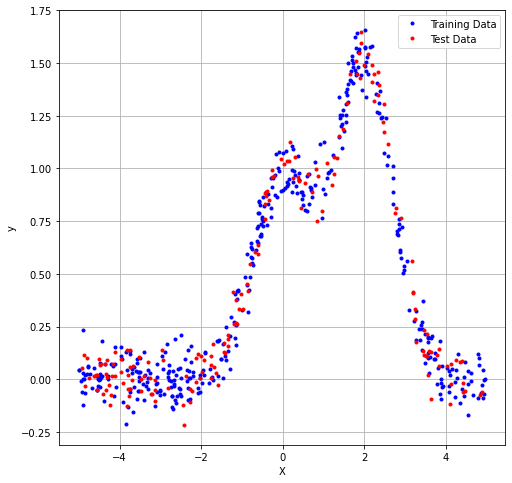

In [3]:
plt.figure(figsize=(8, 8))
plt.plot(X_train, y_train, ".b", label="Training Data")
plt.plot(X_test, y_test, ".r", label="Test Data")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

### ADABoost with Decision Tree Regressor

The core principle of ADABoost is like the above mention Boosting Ensemble Method. It fits to a sequnce of weak learners, those give performance just about the random prediction.

>"The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction. The data modifications at each so-called boosting iteration consist of applying weights 
, 
, …, 
 to each of the training samples. Initially, those weights are all set to 
, so that the first step simply trains a weak learner on the original data. For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence"

source [ADA Boost Definition at Sklearn](https://scikit-learn.org/stable/modules/ensemble.html#adaboost)

Please refer the below image for recalling how the Boosting Method work.

<img src='./graphic/1.png' width='550' height='550'>

### Decision Tree Regressor

We will be using a **Decision Tree Regressor** to fit the *training set* of the datapoints. To show the comparison, we do a similar regression but this time with ADABoost for *n=100* iterations. Once, both the models are trained, we predict the output values for each point in *test dataset* and compare the values of the true and predicted outputs in terms of Mean Squared Error.

> "Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.
For instance, in the example below, decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model."

source [Decision Tree Definition at Sklearn](https://scikit-learn.org/stable/modules/tree.html#tree)

<img src='./graphic/2.png' width='550' height='550'>

### Additional reading

[Bagging on Low Variance Models](https://towardsdatascience.com/bagging-on-low-variance-models-38d3c70259db)

In [4]:
# Controls the random seed given at each base_estimator at each boosting iteration
rng = np.random.RandomState(1)

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=3)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3),
                          n_estimators=25, random_state=rng)

In [5]:
# Train the regressor model

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  n_estimators=25,
                  random_state=RandomState(MT19937) at 0x7F8DE3157BA0)

In [6]:
# Predict for validation

#X_test = np.sort(X_test, axis=0)
X_test, y_test = zip(*sorted(zip(X_test, y_test)))
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

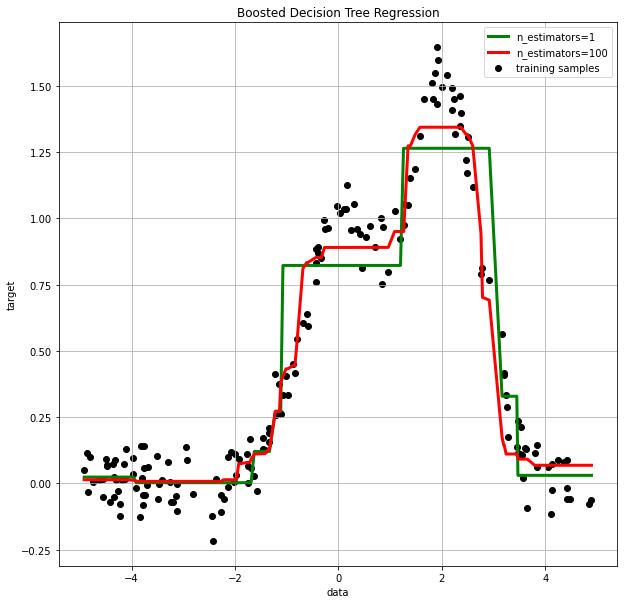

In [7]:
# Plot the results
plt.figure(figsize=(10, 10))

plt.scatter(X_test, y_test, c="k", label="training samples")
plt.plot(X_test, y_1, c="g", label="n_estimators=1", linewidth=3)
plt.plot(X_test, y_2, c="r", label="n_estimators=100", linewidth=3)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.grid()
plt.show()

### Validation

Now we can use our *test dataset* to predict the output and compute the Mean Squared Error with rest to the true output.

In [8]:
from sklearn.metrics import mean_squared_error

mse1 = mean_squared_error(y_test, y_1)
print('The MSE for Decision Tree Reg. is : {}'.format(mse1))

mse2 = mean_squared_error(y_test, y_2)
print('The MSE for ADABoost Decision Tree Reg. is : {}'.format(mse2))

The MSE for Decision Tree Reg. is : 0.024080804548364032
The MSE for ADABoost Decision Tree Reg. is : 0.011434869050070823


### As observed, the mean prediction error in the Boosting Estimator is reduced by half.

# What can you do to further contribute in this notebook ?